# 比較牛頓法與梯度下降法逼近極值的收斂速度

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 本次作業以$ x^3+3x^2+2x+3 $ 為例（當然也可以自行調整係數），比較牛頓法與梯度下降法逼近極值的收斂速度
### 其中起始值$ x_0=3 $，迭代次數上限為30，誤差$ err = 0.001$，學習率$ \gamma=0.07$

In [121]:
# Newton Method
def NM(a,b,c,x0,lim,err):
    def y(x):
        return x**3+a*x**2+b*x+c # x^3+3x^2+2x+3
    def yp(x):
        return 3*x**2+2*a*x+b # 一次微分
    def ypp(x):
        return 6*x+2*a # 二次微分
    
    x_min=(-2*a+np.sqrt(4*a**2-12*b))/6 # 局部極小值
    iter_n=0 # 迭代次數歸零
    for i in range(lim):
        while (yp(x0)!=0) & (iter_n<lim) & (abs(x0-x_min)>err): 
            plt.scatter(x0,y(x0))
            x1=x0-yp(x0)/ypp(x0) # 牛頓法公式：x_n+1=x_n+f'(x_n)/f''(x_n)
            x0=x1
            iter_n+=1
    print(iter_n,x0,x_min)
    x_draw=np.linspace(-3,3,100)
    y0=y(x_draw)
    plt.plot(x_draw,y0)
    fig = plt.gcf()
    fig.set_size_inches(16,9)

5 -0.4225444243840101 -0.42264973081037427


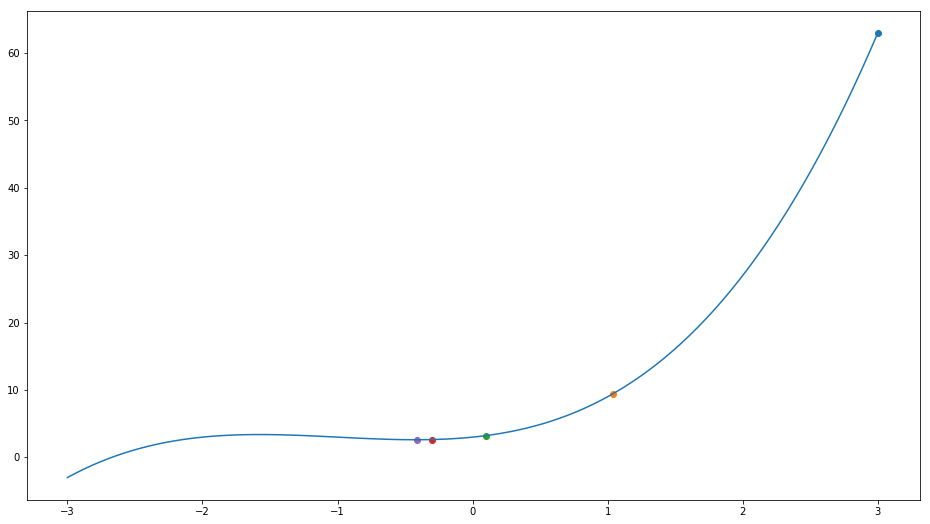

In [122]:
NM(3,2,3,3,30,0.001)

In [116]:
# Gradient Descend
def GD(a,b,c,x0,lim,lr,err):
    def y(x):
        return x**3+a*x**2+b*x+c
    def yp(x):
        return 3*x**2+2*a*x+b
    x_min=(-2*a+np.sqrt(4*a**2-12*b))/6
    iter_g=0
    for i in range(lim):
        while (iter_g<lim) & (abs(x0-x_min)>err):
            plt.scatter(x0,y(x0))
            x1=x0-lr*yp(x0)
            x0=x1
            iter_g+=1
    print(iter_g,x0,x_min)
    x_draw=np.linspace(-3,3,100)
    y0=y(x_draw)
    plt.plot(x_draw,y0)
    fig = plt.gcf()
    fig.set_size_inches(16,9)

19 -0.4218741882370021 -0.42264973081037427


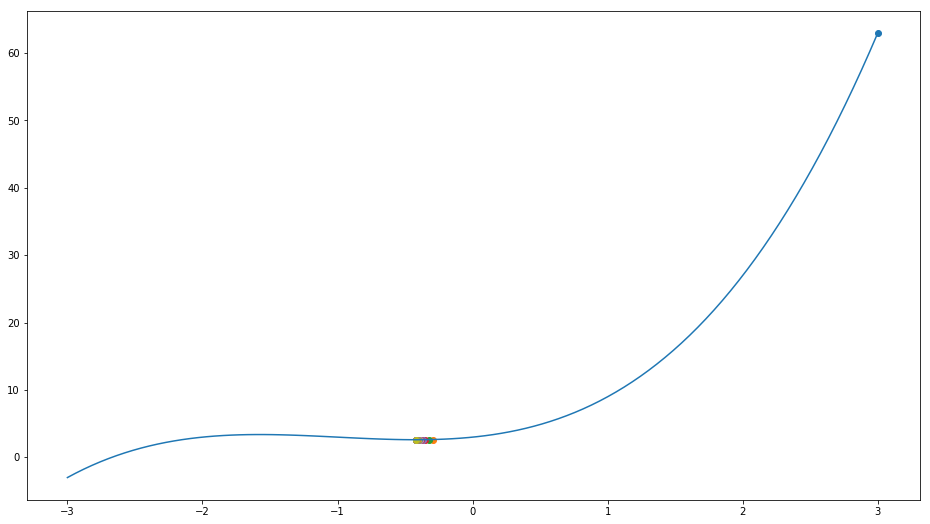

In [131]:
GD(3,2,3,3,30,0.07,0.001)

### 心得：可以發現，同樣的函數與起始值，牛頓法只需迭代5次即可將誤差降至$ 10^{-3} $以下，而梯度下降法則需要19次才能得到一樣的誤差。如果學習率調小的話，需要的次數則更多（例如$ \gamma=0.03 $時，需要61次才能達到$ 10^{-3}$ 以下的誤差）。